In [2]:
import pandas as pd

df = pd.read_pickle('../data/output/original.pkl')
SURVEY_YEAR = df['SURVEY_YEAR'].unique()
df.head(10)

IDENTIFIER  SURVEY_YEAR  RACE  SAMPLE_ID  GENDER  \
Identifier Survey Year                                                     
1          1978                  1         1978     3        5.0       2   
           1979                  1         1979     3        5.0       2   
           1980                  1         1980     3        5.0       2   
           1981                  1         1981     3        5.0       2   
           1982                  1         1982     3        5.0       2   
           1983                  1         1983     3        5.0       2   
           1984                  1         1984     3        5.0       2   
           1985                  1         1985     3        5.0       2   
           1986                  1         1986     3        5.0       2   
           1987                  1         1987     3        5.0       2   

                        ROTTER_SCORE  ROTTER_1  ROTTER_2  ROTTER_3  ROTTER_4  \
Identifier Survey Year                                                         
1          1978                 11.0       2.0       2.0       2.0       2.0   
           1979                 11.0       2.0       2.0       2.0       2.0   
           1980                 11.0       2.0       2.0       2.0       2.0   
           1981                 11.0       2.0       2.0       2.0       2.0   
           1982                 11.0       2.0       2.0       2.0       2.0   
           1983                 11.0       2.0       2.0       2.0       2.0   
           1984                 11.0       2.0       2.0       2.0       2.0   
           1985                 11.0       2.0       2.0       2.0       2.0   
           1986                 11.0       2.0       2.0       2.0       2.0   
           1987                 11.0       2.0       2.0       2.0       2.0   

                             ...        ENROLLED_SCHOOL_OCTOBER  \
Identifier Survey Year       ...                                  
1          1978              ...                            NaN   
           1979              ...                            NaN   
           1980              ...                            NaN   
           1981              ...                            NaN   
           1982              ...                            NaN   
           1983              ...                            NaN   
           1984              ...                            NaN   
           1985              ...                            NaN   
           1986              ...                            NaN   
           1987              ...                            NaN   

                        ENROLLED_SCHOOL_NOVEMBER  ENROLLED_SCHOOL_DECEMBER  \
Identifier Survey Year                                                       
1          1978                              NaN                       NaN   
           1979                              NaN                       NaN   
           1980                              NaN                       NaN   
           1981                              NaN                       NaN   
           1982                              NaN                       NaN   
           1983                              NaN                       NaN   
           1984                              NaN                       NaN   
           1985                              NaN                       NaN   
           1986                              NaN                       NaN   
           1987                              NaN                       NaN   

                        HIGHEST_DEGREE_RECEIVED  OCCALL70_MOD_JOB_1  \
Identifier Survey Year                                                
1          1978                             NaN                 NaN   
           1979                             NaN               325.0   
           1980                             NaN                 NaN   
           1981                             NaN      

We want a graph with the sample size over time.

In [2]:
num_obs = []
for year in SURVEY_YEAR:
    cond = df['IS_INTERVIEWED'].loc[:, year] == True
    num_obs += [df['IDENTIFIER'].loc[:, year][cond].count()]

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(df['SURVEY_YEAR'].unique(), num_obs)
plt.show()

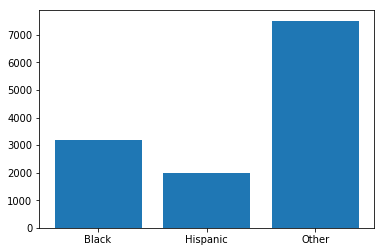

In [4]:
# GENDER KEYA 1 MALE, 2 FEMALE, RACE 1 Hispacnix, 2 Black, 3 Other


dat =  df['RACE'].loc[:, 1978].astype('category')
dat = dat.cat.rename_categories({1: 'Hispanic', 2:'Black', 3:'Other'})
dat = dat.value_counts().to_dict()

fig, ax = plt.subplots()
ax.bar(dat.keys(), dat.values())
plt.show()


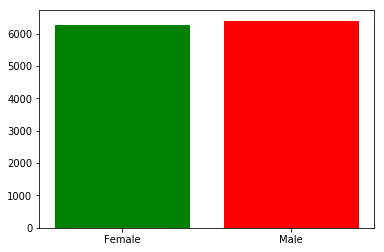

In [36]:
dat =  df['GENDER'].loc[:, 1978].astype('category')
dat = dat.cat.rename_categories({1: 'Male', 2:'Female'})
dat = dat.value_counts().to_dict()

fig, ax = plt.subplots()
ax.bar(dat.keys(), dat.values(), color='rg')
plt.show()


In [22]:
dat =  df['YEAR_OF_BIRTH'].loc[:, 1978]
dat = dat.value_counts().to_dict()


del dat[1956]
print(dat)
#fig, ax = plt.subplots()
#ax.bar(dat.keys(), dat.values())
#plt.show()


{1959: 1720, 1958: 1678, 1957: 1677, 1960: 1663, 1962: 1596, 1963: 1554, 1961: 1528, 1964: 1265, 1965: 2, 1955: 1}


In [3]:
import seaborn as sns
dat =  df['ASVAB_ARITHMETIC_REASONING'].loc[:, 1978].dropna()

sns.set(color_codes=True)
sns.distplot(dat, axlabel='ASVAB Arithmetic Reasoning')


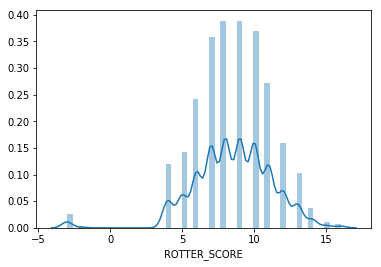

In [6]:
import seaborn as sns
dat =  df['ROTTER_SCORE'].loc[:, 1978].dropna()
sns.distplot(dat)

In [87]:
info = df[['WAGE_HOURLY_JOB_1', 'AFQT_1']]
dat = info.loc[(slice(None), 1991), ['AFQT_1', 'WAGE_HOURLY_JOB_1']]

dat = dat.dropna()

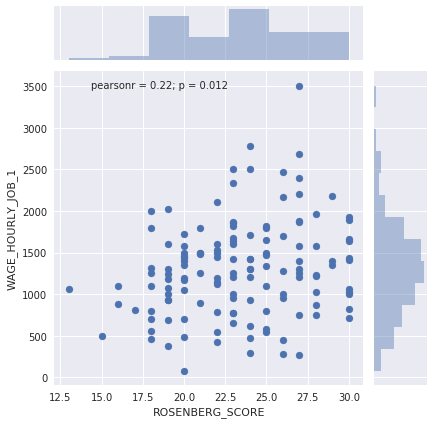

In [23]:
df = pd.read_pickle('../data/output/original.pkl')
df = df.loc[(slice(1,200), 1991), ['ROSENBERG_SCORE', 'WAGE_HOURLY_JOB_1']]

#sns.jointplot(dat['WAGE_HOURLY_JOB_1'], dat['AFQT_1'])
cond = df['WAGE_HOURLY_JOB_1'].between(0, 6000)
dat_wage = df['WAGE_HOURLY_JOB_1'][cond]
#dat_cog = df['AFQT_RAW'][cond]
dat_cog = df['ROSENBERG_SCORE'][cond]

sns.jointplot(dat_cog, dat_wage)
